In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import bisect

In [2]:
file = 'calhounS.csv'

In [3]:
from drawdowns import find_drawdowns
data = np.array(pd.read_csv(file)).T.squeeze()
drawdowns = find_drawdowns(data)

There are 1776 total downvals
There are 1776 total upvals


In [4]:
def plot_ups_and_downs(data, offset=10):
    slope = np.diff(data)
    rev = np.diff((slope > 0).astype(int))
    down_locs,  = np.where(rev < 0)
    up_locs,  = np.where(rev > 0)
    up_vals = data[up_locs + 1]
    down_vals = data[down_locs + 1]
    plot.plot(data)
    # plot.plot(down_locs,down_vals,'r')
    for loc, val in zip(down_locs, down_vals):
        plot.annotate("",xy=(loc,val), xytext=(loc,val+offset),
                        arrowprops=dict(arrowstyle="->",color="red"))
    for loc, val in zip(up_locs, up_vals):
        plot.annotate("",xy=(loc,val), xytext=(loc,val-offset),
                         arrowprops=dict(arrowstyle="->",color="green"))

def cum_dist(data):
    x = np.sort(data)
    y = np.arange(len(data))/float(len(data))
    return x, y


Text(0.5, 1.0, 'CDF of Drawdown Sizes, F(d)')

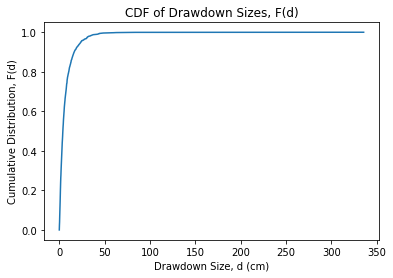

In [5]:
x, y = cum_dist(drawdowns)
plot.plot(x,y)
plot.xlabel('Drawdown Size, d (cm)')
plot.ylabel('Cumulative Distribution, F(d)')
plot.title('CDF of Drawdown Sizes, F(d)')

([<matplotlib.axis.XTick at 0x7fad40ebf710>,
 <a list of 5 Text xticklabel objects>)

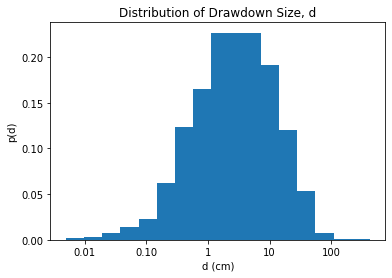

In [6]:
y,x = np.histogram(np.log10(drawdowns),bins=15)
y = y/np.sum(y)
plot.bar(x[0:-1],y)
plot.title('Distribution of Drawdown Size, d')
plot.xlabel('d (cm)')
plot.ylabel('p(d)')
plot.xticks(ticks=[-2, -1, 0, 1, 2],labels=['0.01','0.10','1','10','100'])

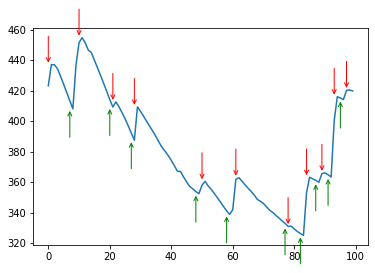

In [7]:
plot_ups_and_downs(data[600:700],offset=20)